# 22 September 2021

## **Latihan KNN & Decision Tree**

### **Gunakan dataset 'cancer'**

### - Untuk simplifikasi, gunakan fitur 'texture_mean' dan 'concave points_mean' saja dengan 20% test set dan random_state = 42.
        - Features: 'texture_mean', 'concave points_mean'
        - Target: 'diagnosis'
  
### - Temukan nilai K terbaik untuk model KNN, lalu gunakan metriks akurasi untuk mengevaluasi performa model antara KNN tanpa dan dengan scaling. 
### - Gunakan model decision tree classifier (max_depth = 2, criterion = 'gini'), lalu bandingkan akurasinya terhadap KNN, manakah yang lebih baik?

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Informasi terkait dataset dapat dilihat pada tautan berikut:** <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)> **atau** <https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

In [2]:
df = pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


M: malignant (ganas)<br>
B: benign (jinak)

In [3]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [4]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [5]:
features = ['texture_mean', 'concave points_mean']
target = ['diagnosis']

X = df[features]
y = df[target]

## **EDA**

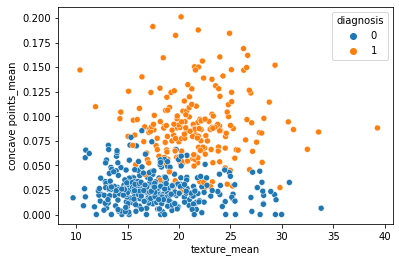

In [6]:
sns.scatterplot(x = 'texture_mean', y = 'concave points_mean', data = df, hue = 'diagnosis');

In [7]:
# Check missing value
df[['texture_mean', 'concave points_mean']].isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

## **Data Splitting**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 42)

## **KNN**

## **Without scaling**

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_class = knn.predict(X_test)

In [10]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7719298245614035


## **With scaling**

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, diaplikasikan hanya pada data training
X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data x_test

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [13]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9210526315789473


**Hasil akurasi dengan metode KNN dengan menggunakan hanya menggunakan 2 features dan scaling sebesar 92.1%**

## **The best K Factor**

In [14]:
df.shape[0]**.5 # mencari kisaran range untuk menentukan K factor terbaik dengan mengakarkan jumlah data

23.853720883753127

In [15]:
# Find the best k
k = range(1, 30, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

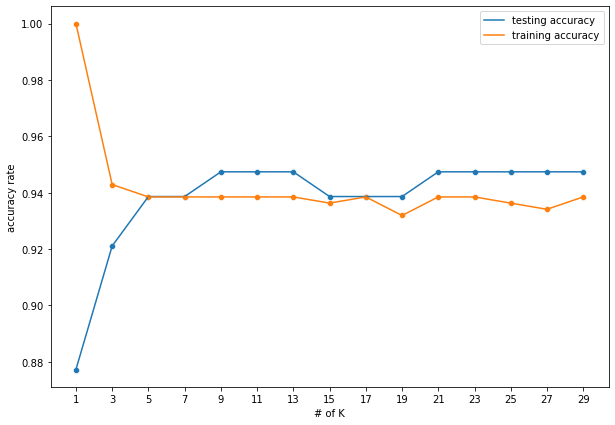

In [16]:
# Plot the accuracies result
plt.figure(figsize=(10, 7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of K')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show()

In [17]:
# The best K with its score
print('Faktor K terbaik =', best_k)
print('Nilai akurasi =', score)

Faktor K terbaik = 9
Nilai akurasi = 0.9473684210526315


### **Interpretasi**

Dari plot di atas, dapat dilihat bahwa jumlah K terbaik adalah 9 dengan accuracy rate mencapai hampir 95%. Semakin banyak K, trend training dan testing accuracy cenderung fluktuatif dan tidak lebih baik dari K = 9.

## **Decision Tree**

In [18]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [19]:
# Define the model
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [20]:
# Fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
# Test the model
y_predict_class = tree.predict(X_test)

In [22]:
# Metric result
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.8859649122807017


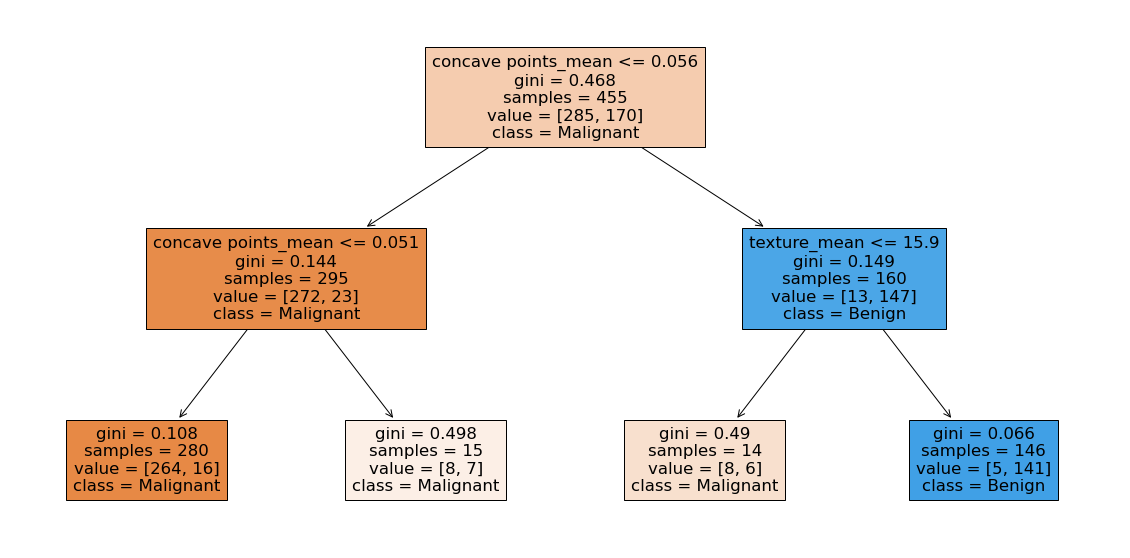

In [23]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True);

## **Interpretasi**

**True**
1. concave points_mean <= 0.056, concave points_mean <= 0.051 (True) --> Malignant
2. concave points_mean <= 0.056, concave points_mean <= 0.051 (False) --> Malignant

**False**
1. concave points_mean <= 0.056, texture_mean <= 15.9 (True) --> Malignant
2. concave points_mean <= 0.056, texture_mean <= 15.9 (False) --> Benign


## **With scaling**

In [24]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit
X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data X_test

In [25]:
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [26]:
# Fit and predict
tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [27]:
# Metric result
print('Model accuracy in test dataset with scaling:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset with scaling: 0.8859649122807017


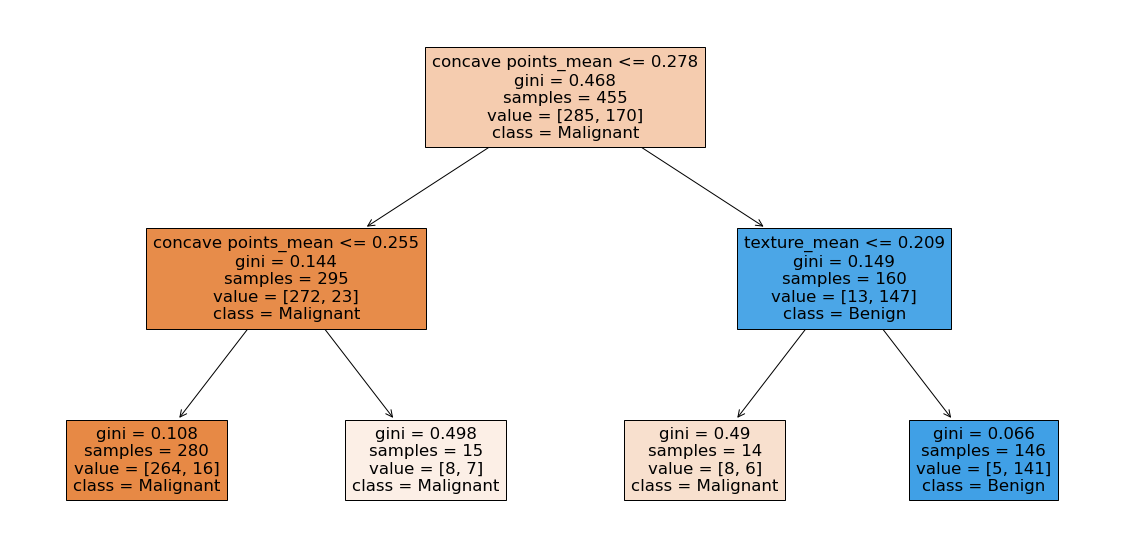

In [28]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True);

## **Without max_depth**

In [29]:
tree = DecisionTreeClassifier(
    criterion='gini'
)

tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [30]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9035087719298246


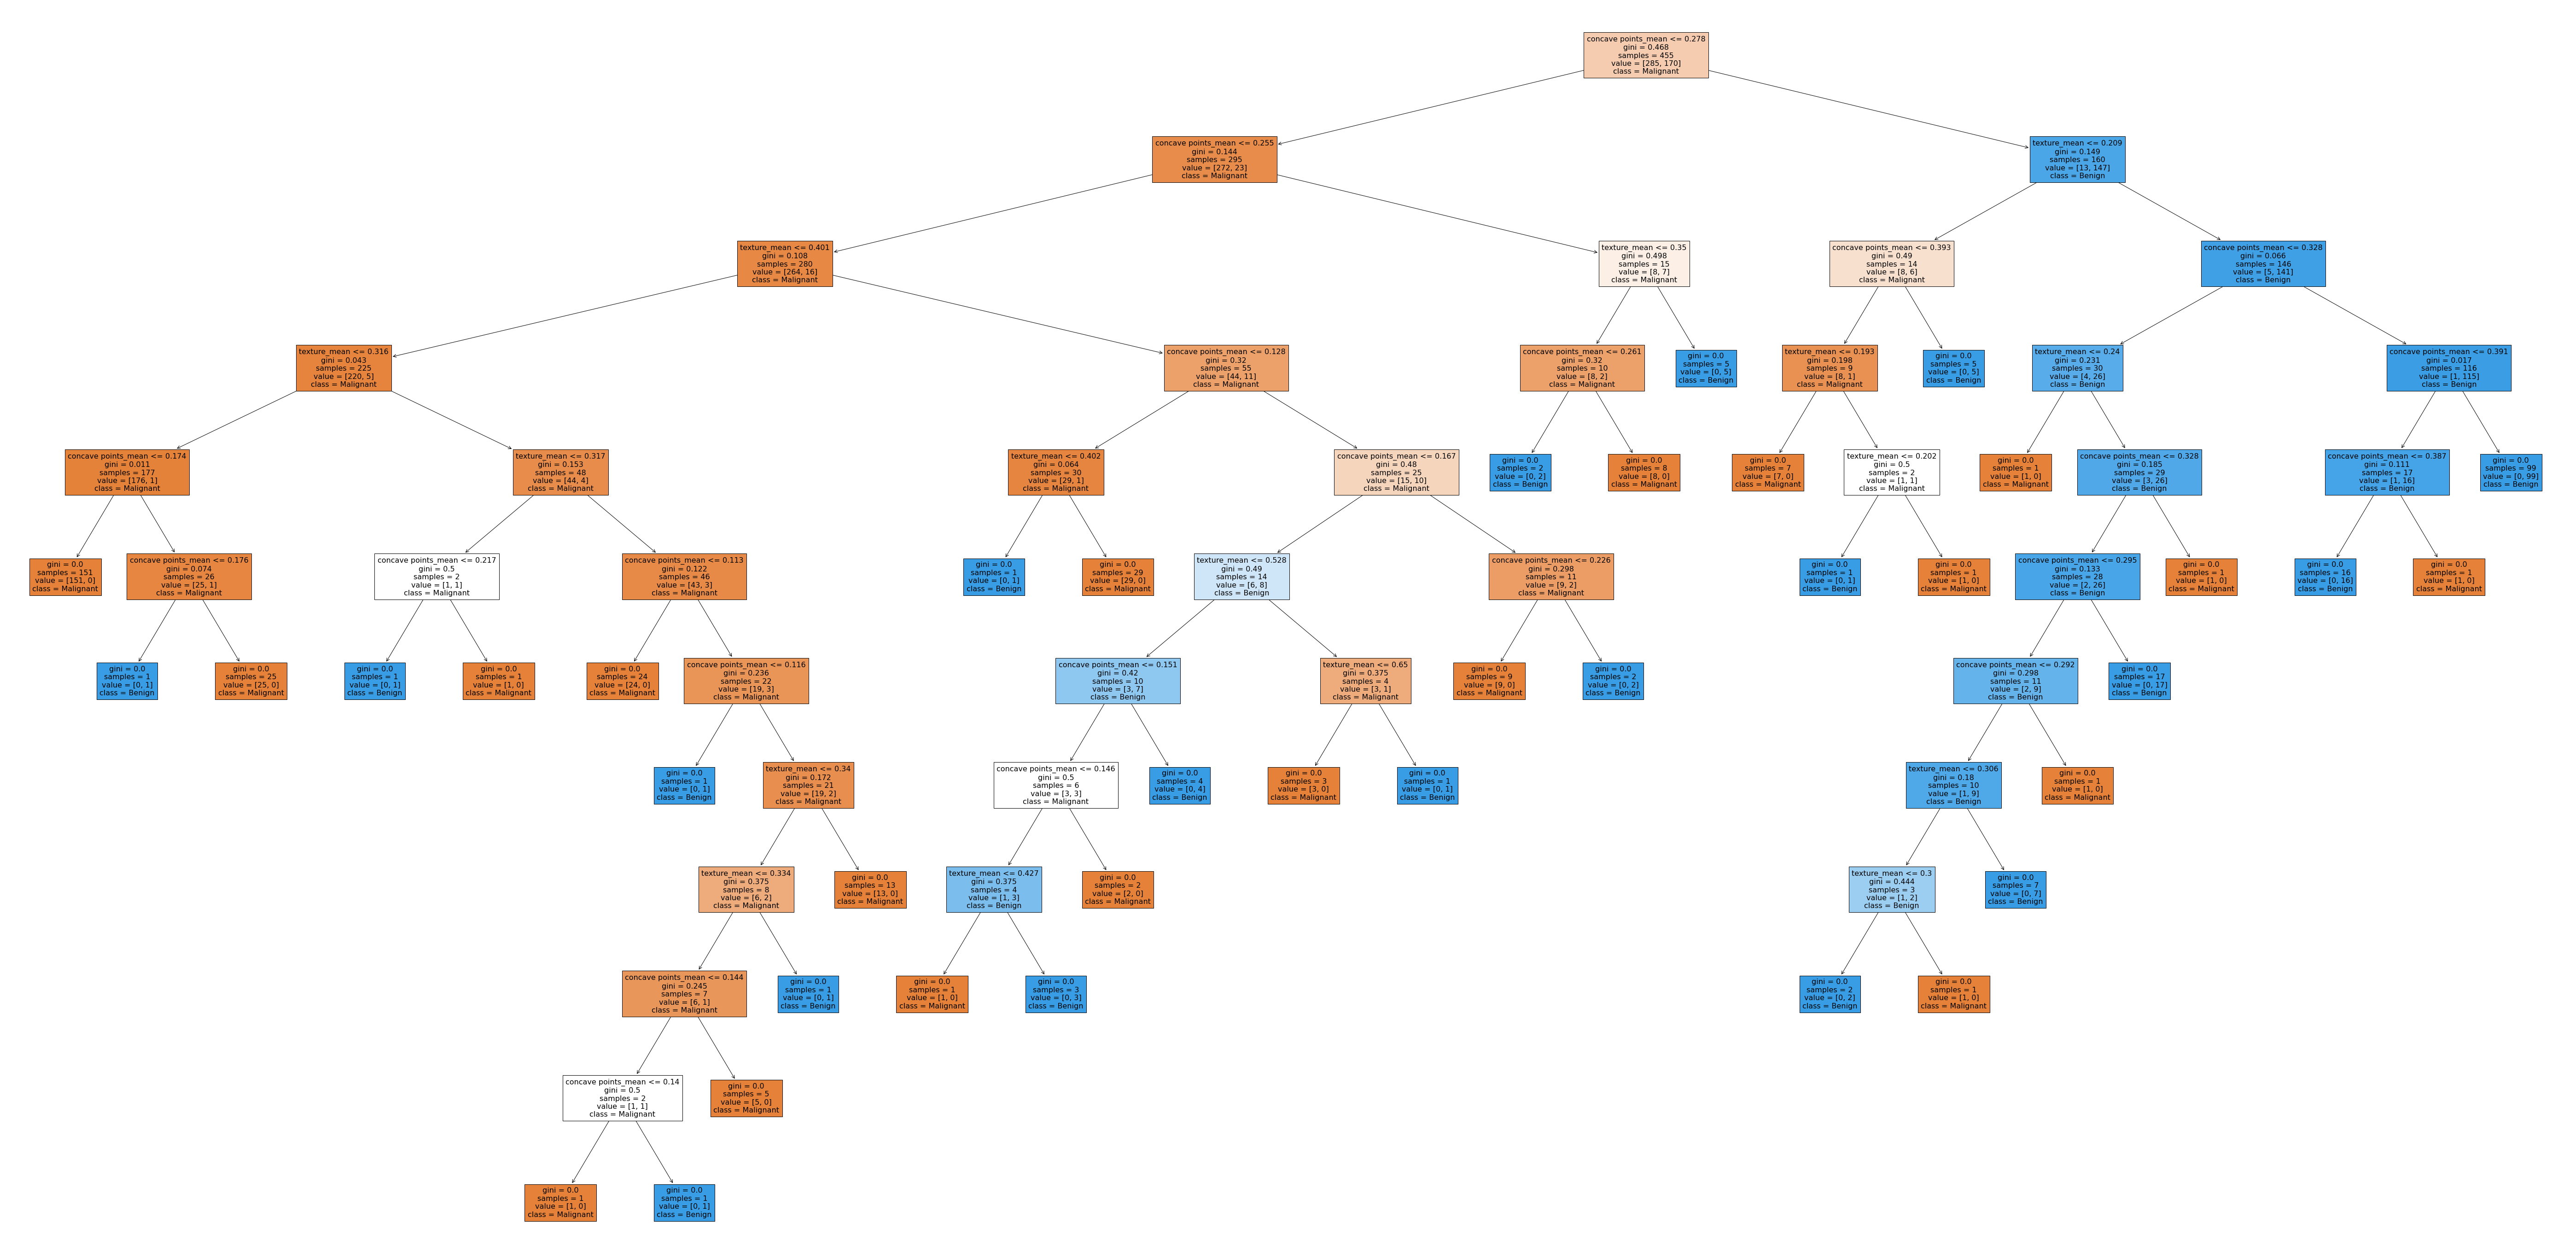

In [31]:
plt.figure(figsize=(100, 50))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True);

## **Interpretasi**

Dengan menggunakan model decision tree dengan depth 2, akurasi yang didapat adalah 88.5%. Lalu, dilakukan scaling, namun hasil akurasi tidak berubah sama sekali. Hal ini terjadi karena meskipun dilakukan scaling, tidak ada perubahan pada heterogenitas data. Dengan kata lain, model decision tidak membutuhkan scaling.

Dilakukan pula percobaan dengan tidak memasukkan jumlah maksimum depth. Dapat dilihat pada plot, proses otomatisasi melakukan klasifikasi hingga depth ke 11 dan nilai gini menjadi 0.00 semua pada node terakhir. Hal ini menyebabkan adanya peningkatan akurasi menjadi 90%, tetapi model menjadi semakin sulit untuk diinterpretasi.

Dengan mengacu pada besarnya nilai akurasi, dapat disimpulkan bahwa model KNN dengan menggunakan scaling lebih baik daripada model Decision Tree untuk prediksi jenis kanker dengan hanya menggunakan 2 features mean. 